In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("D:\\Machine Learning\\titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df1=df.drop(["Cabin","Name","Ticket"], axis=1)
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [7]:
df1.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,446.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [8]:
df1['Age']=df1['Age'].fillna(value=29.69)
df1['Embarked']=df1['Embarked'].fillna(method='ffill')


In [9]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [10]:
df1.groupby('Sex')[['Survived']].sum()

,Survived
Sex,
female,233
male,109


In [11]:
df1.groupby(['Sex','Pclass'])[['Survived']].sum()

Survived
Sex    Pclass          
female 1             91
       2             70
       3             72
male   1             45
       2             17
       3             47

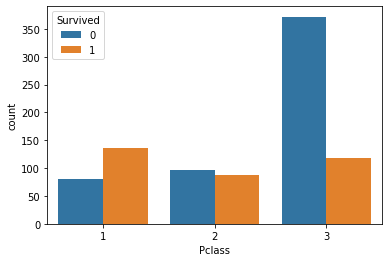

In [12]:
import seaborn as sns
sns.countplot(x="Pclass",hue="Survived",data=df1)

In [13]:
df1.pivot_table(index='Sex', columns='Pclass',aggfunc={'Survived':sum })

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

In [14]:
df1["Embarked"]=df1["Embarked"].map({"S":0,"C":1,"Q":2})

In [15]:
df1["Embarked"].sample(5)

568    1
612    2
51     0
483    0
736    0
Name: Embarked, dtype: int64

In [16]:
df1["Sex"]=df1["Sex"].map({"male":0,"female":1})


In [17]:
df1["Sex"].sample(5)


310    1
621    0
143    0
20     0
523    1
Name: Sex, dtype: int64

In [18]:
corr=df1.corr()
corr.nlargest(8,["Survived"])["Survived"]

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.113083
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069783
Name: Survived, dtype: float64

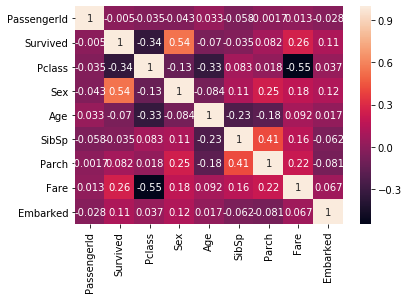

In [19]:
sns.heatmap(corr,annot=True)

In [20]:
x=df1[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch","Fare", "Embarked"]]
y=df1["Survived"]

In [21]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,3,0,35.0,0,0,8.0500,0


In [22]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [24]:
x_train.shape, y_train.shape

((712, 8), (712,))

# 1. Logistic Regressoin  

In [25]:
x_test.shape, y_test.shape

((179, 8), (179,))

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
logistic_regression = round(accuracy_score(y_test, y_pred)*100, 2)
print(logistic_regression) 

79.89


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
x_test["actual_y"]=y_test
x_test["prediction"]=y_pred
x_test

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,actual_y,prediction
495,496,3,0,29.69,0,0,14.4583,1,0,0
648,649,3,0,29.69,0,0,7.5500,0,0,0
278,279,3,0,7.00,4,1,29.1250,2,0,0
31,32,1,1,29.69,1,0,146.5208,1,1,1
255,256,3,1,29.00,0,2,15.2458,1,1,1
298,299,1,0,29.69,0,0,30.5000,0,1,0
609,610,1,1,40.00,0,0,153.4625,0,1,1
318,319,1,1,31.00,0,2,164.8667,0,1,1
484,485,1,0,25.00,1,0,91.0792,1,1,1
367,368,3,1,29.69,0,0,7.2292,1,1,1


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[93, 17],
       [19, 50]], dtype=int64)

In [30]:
pd.crosstab(y_test, y_pred, rownames=['True'] , colnames=['prediction'], margins= True)

prediction,0,1,All
True,,,
0,93,17,110
1,19,50,69
All,112,67,179


In [31]:
from sklearn.metrics import classification_report
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [32]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import classification_report
report= classification_report(y_test, pred_y)
print(report)

In [33]:
sns.barplot(x1, y1, data=data)
sns.pointplot(x1, y1, data=data)
plt.bone()

NameError: name 'x1' is not defined

In [34]:
def normalized_sigmoid_fkt(a, b, x):
    s= 1/(1+np.exp(b*(x-a)))
    return 1*(s-min(s))/(max(s)-min(s)) # normalize function to 0-1


In [35]:
def draw_function_on_2x2_grid(x): 
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=.5)
    plt.subplots_adjust(hspace=.5)

    ax1.plot(x, normalized_sigmoid_fkt( .5, 18, x))
    ax1.set_title('1')

    ax2.plot(x, normalized_sigmoid_fkt(0.518, 10.549, x))
    ax2.set_title('2')

    ax3.plot(x, normalized_sigmoid_fkt( .7, 11, x))
    ax3.set_title('3')

    ax4.plot(x, normalized_sigmoid_fkt( .2, 14, x))
    ax4.set_title('4')
    plt.suptitle('Different normalized (sigmoid) function',size=10 )

    return fig

x = np.linspace(0,1,100)
Travel_function = draw_function_on_2x2_grid(x)


# 2. Gaussian Naive Bayes 

In [36]:
from sklearn.naive_bayes import  GaussianNB
gauss = GaussianNB()
gauss.fit(x_train, y_train)
y_pred=gauss.predict(x_test)
gaussian = round(accuracy_score(y_test, y_pred)*100, 2)
print(gaussian) 

ValueError: operands could not be broadcast together with shapes (179,10) (8,) 

# 3. Support Vector Machine 

In [37]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
svm = round(accuracy_score(y_test, y_pred)*100, 2)
print(svm) 


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


ValueError: X.shape[1] = 10 should be equal to 8, the number of features at training time

# 4. Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
perc = Perceptron()
perc.fit(x_train, y_train)
y_pred=perc.predict(x_test)
perceptron =round(accuracy_score(y_test, y_pred)*100, 2)
print(perceptron)

# 5. Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec =  DecisionTreeClassifier()
dec.fit(x_train, y_train)
y_pred=dec.predict(x_test)
decisiontreeclassifier =round(accuracy_score(y_test, y_pred)*100, 2)
print(decisiontreeclassifier)

# 6. Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ranf = RandomForestClassifier()
ranf.fit(x_train, y_train)
y_pred=ranf.predict(x_test)
randomforestclassifier =round(accuracy_score(y_test, y_pred)*100, 2)
print(randomforestclassifier)

# 7. K Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
knnclassifier =round(accuracy_score(y_test, y_pred)*100, 2)
print(knnclassifier)

# 8. Stochastic Gradient Descent 

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred=sgd.predict(x_test)
sgdclassifier =round(accuracy_score(y_test, y_pred)*100, 2)
print(sgdclassifier)

# 9. Gradient Boosting Classifier 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred=gbc.predict(x_test)
gbclassifier =round(accuracy_score(y_test, y_pred)*100, 2)
print(gbclassifier)

# 10. Linear SVC 

In [ ]:
from sklearn.svm import  LinearSVC
lin_svc = GaussianNB()
lin_svc.fit(x_train, y_train)
y_pred=lin_svc.predict(x_test)
linear_svm = round(accuracy_score(y_test, y_pred)*100, 2)
print(linear_svm) 

# 11. Linear Regression 

from sklearn.linear_model import LinearRegression
lin= LinearRegression()
lin.fit(x_train, y_train)
y_pred=lin.predict(x_test)
linearregression=round(accuracy_score(y_test, y_pred)*100, 2)
print(linearregression)

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Accuracy_Score': [svm, knnclassifier,logistic_regression, randomforestclassifier, gaussian, 
                       perceptron, linear_svm, decisiontreeclassifier, sgdclassifier, gbclassifier]})
models.sort_values(by='Accuracy_Score', ascending=False)